# Abbott Power Plant: Thermal Plant at UIUC

This notebook develops some information about the thermal plant at UIUC, Abbott Power Plant.

All basic data comes from the UIUC Utilities Production Master Plan, unless otherwise noted.

Abbott uses 'ethos' as a 'fuel,' similar to solar, wind, and nuclear. This is because Abbott can use multiple types of fuel and has ability to turn any of them on or off.

The overall "efficiency" of Abbott turbines is determined by dividing its firm steam generation ability by its firm electricity generation capacity, after converting pounds-per-hour to MWth. This is only an approximation.

$$ \eta P_{th}=P_{e}$$

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

In [1]:
h_in = 196 # BTU/lb
h_out = 1368 # BTU/lb
btu_to_kwh = 0.29307107


# times 0.29307107 to convert from BTU/hr to kilowatts
to_kwth = lambda mdot: (mdot*(h_out-h_in))*btu_to_kwh

In [6]:
firm_thermal = to_kwth(460)/1e3  # MWth
firm_turbine = 79.5  # MWe
eta = firm_turbine/firm_thermal
print(f"Abbott turbines are approximately {eta*100} percent efficient")

Abbott turbines are approximately 50.31630434654242 percent efficient


In [8]:
investment_costs = np.array([2.229e6, 28.509e6, 7e5, 27.228e6,6.418e6, 11.21e6, 9.9e6, 8.695e6, 30.7e6, 17.87e6]).sum()
total_thermal = to_kwth(760)/1e3

print(f"Abbott steam capacity costs {investment_costs/total_thermal/1e6} M$/MWth")

Abbott steam capacity costs 0.549558140419611 M$/MWth


In [12]:
cf = firm_thermal/total_thermal;cf  # approximately the capacity factor of abbott power plant

0.6052631578947368

In [13]:
variable_costs = 1.027e3/(36*firm_thermal*8.76)  # M$/GWh
variable_costs # in 2014 dollars. This is a believable number.

0.02061130279137871

In [38]:
total_thermal

261.0442634704

In [15]:
url = "https://download.bls.gov/pub/time.series/cu/cu.data.0.Current"
cpi_data = pd.read_csv(url, sep='\t')
cpi_key = cpi_data.keys()[0]
cu = list(cpi_data[cpi_key])[0]
cpi_u = cpi_data[cpi_key] == cu
cpi_data = cpi_data[cpi_u]
cpi_data.index = pd.to_datetime(cpi_data.iloc[:,1], format='%Y')
cpi_average = cpi_data.resample('Y').mean()

In [16]:
def inflate(p_old, start_year, target_year=2021):
    """
    This function calculates the inflated value of an item
    based on the Consumer Price Index from the Bureau of 
    Labor Statistics.
    
    Parameters
    ----------
    p_old : float
        The old price or value of an item. I.e. the price of
        the item at the starting year.
    start_year : integer
        The year from which you would like to inflate. E.g.
        the price of milk in 1997 inflated to today's dollars.
    target_year : integer
        The target year you would like to inflate to. E.g.
        the price of milk in 1997 inflated to 2021 dollars.
        Default is 2021.
        
    Returns
    -------
    p_adj : float
        The price adjusted for inflation.
    """
    cpi_current = float(cpi_average[cpi_average.iloc[:,0]==target_year].iloc[:,1])    
    cpi_old = float(cpi_average[cpi_average.iloc[:,0]==start_year].iloc[:,1])
    
    p_adj = (p_old*cpi_current)/cpi_old
    
    return p_adj

In [17]:
inflate(variable_costs, 2014)

0.023009206685924793

In [18]:
inflate(investment_costs/total_thermal/1e6,2014)

0.6134933326066324

In [19]:
fixed_costs = 407/(firm_thermal/1e3*36)
inflate(fixed_costs, 2014)  # M$/GW-year

79.87846619421751

## Check Ramp Rates

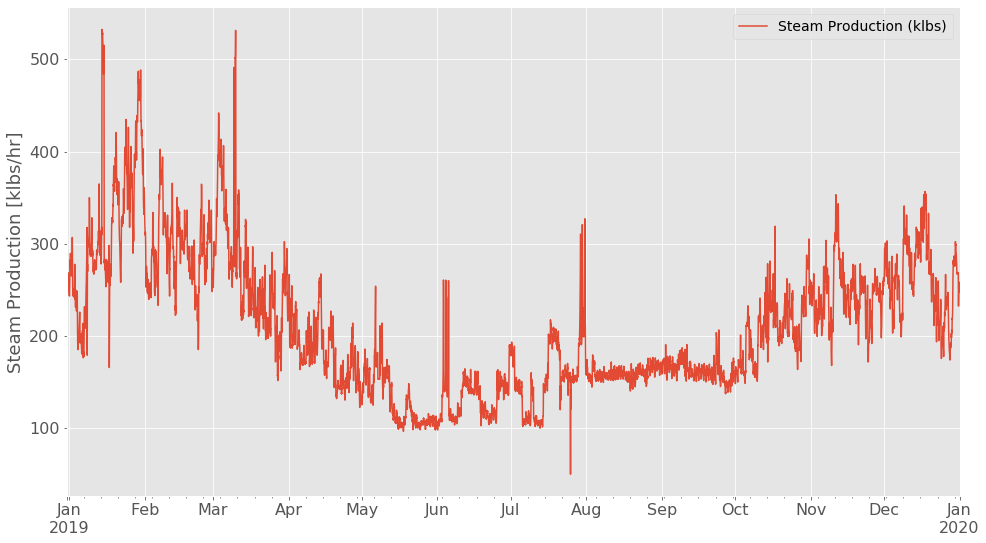

In [28]:
stm_data = pd.read_csv("../2019energydata.csv", skiprows=1, usecols=['Steam Production (klbs)'])
daterange = pd.date_range(start='12/31/2018', end='1/1/2020', freq='min')

stm_data.index = daterange
stm_data_hourly = stm_data.resample('H').mean()
stm_data_hourly.plot(figsize=(16,9))
plt.ylabel('Steam Production [klbs/hr]', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=14)
plt.show()

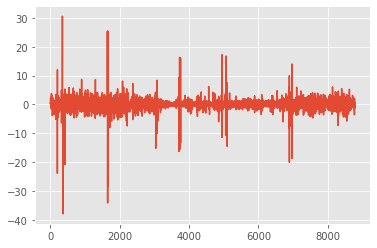

In [34]:
plt.plot(np.diff(stm_data_hourly['Steam Production (klbs)'])/np.max(stm_data_hourly['Steam Production (klbs)'])*100)

In [37]:
np.max(np.diff(stm_data_hourly['Steam Production (klbs)'])/np.max(stm_data_hourly['Steam Production (klbs)']))

0.30601238495086625

In [43]:
to_kwth(stm_data_hourly['Steam Production (klbs)'].sum())/(total_thermal*8.76)/1e6

0.27550547081030674